# Análisis de Componentes Principales (PCA) aplicado al dataset Wine Quality con Python

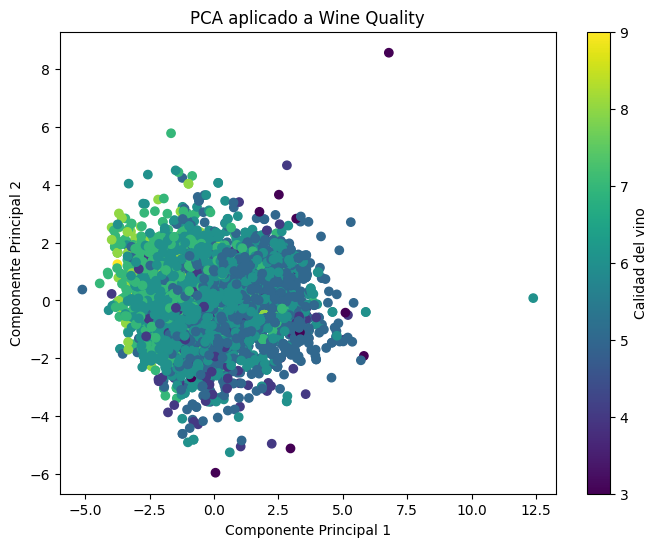

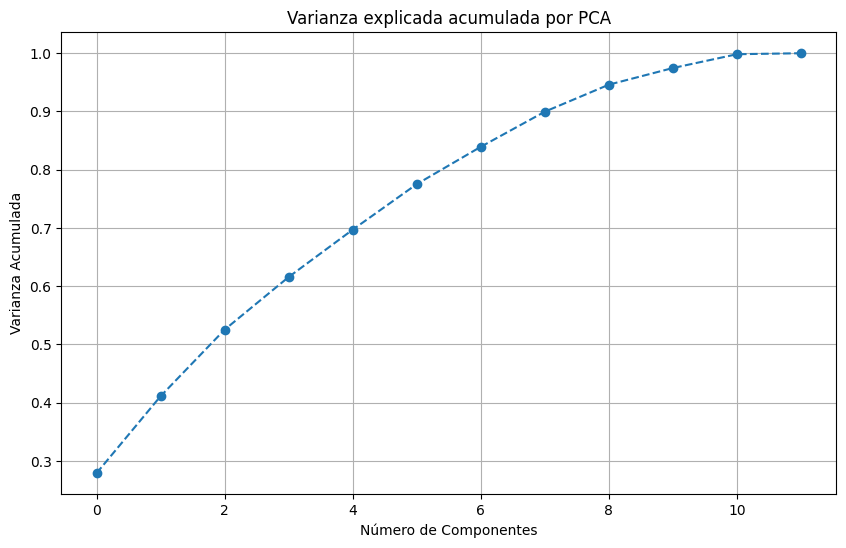

Se necesitan 10 componentes para retener el 95% de la varianza.


In [28]:
# Importamos las bibliotecas necesarias
import pandas as pd  # Para manipulación de datos en formato DataFrame
import numpy as np  # Para operaciones matemáticas y manejo de arrays
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.decomposition import PCA  # Algoritmo de Análisis de Componentes Principales (PCA)
import matplotlib.pyplot as plt  # Para visualización de gráficos
import seaborn as sns  # Biblioteca de visualización basada en Matplotlib

# Cargamos el dataset en un DataFrame de pandas
data = pd.read_csv('wine-quality.csv')  # Se asume que el archivo está en el directorio actual

# Estandarizamos los datos para que cada característica tenga media 0 y desviación estándar 1
scaler = StandardScaler()  # Creamos una instancia del estandarizador
data_scaled = scaler.fit_transform(data)  # Ajustamos y transformamos los datos

# Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)  # Definimos el número de componentes a 2
data_pca = pca.fit_transform(data_scaled)  # Transformamos los datos estandarizados

# Visualización de los datos transformados en dos dimensiones (PC1 y PC2)
plt.figure(figsize=(8, 6))  # Definimos el tamaño de la figura
scatter = plt.scatter(
    x=data_pca[:, 0], y=data_pca[:, 1],  # Ejes X y Y corresponden a los componentes principales
    c=data['quality'], cmap='viridis'  # Coloreamos los puntos según la calidad del vino
)
plt.title('PCA aplicado a Wine Quality')  # Título del gráfico
plt.xlabel('Componente Principal 1')  # Etiqueta del eje X
plt.ylabel('Componente Principal 2')  # Etiqueta del eje Y

# Agregamos una barra de color para interpretar la escala de calidad
plt.colorbar(scatter, label='Calidad del vino')  # Barra de color con etiqueta
plt.show()  # Mostramos el gráfico

# Cálculo de la varianza explicada por cada componente
pca_full = PCA()  # Creamos otra instancia de PCA sin limitar el número de componentes
pca_full.fit(data_scaled)  # Ajustamos el modelo con los datos estandarizados
explained_variance = pca_full.explained_variance_ratio_  # Guardamos la varianza explicada por componente

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')  # Gráfico acumulado con marcadores
plt.xlabel('Número de Componentes')  # Etiqueta del eje X
plt.ylabel('Varianza Acumulada')  # Etiqueta del eje Y
plt.title('Varianza explicada acumulada por PCA')  # Título del gráfico
plt.grid(True)  # Agregamos una cuadrícula para facilitar la lectura
plt.show()  # Mostramos el gráfico

# Determinamos cuántas componentes se necesitan para retener al menos el 95% de la varianza
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1  # Encontramos el número mínimo de componentes
print(f"Se necesitan {num_components} componentes para retener el 95% de la varianza.")

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Comentario sobre posibles mejoras:
1. **Manejo de datos faltantes:** Si el dataset contiene valores nulos, el código fallará. Se podría agregar una línea para manejar estos casos:  
   ```python
   data = data.dropna()  # Elimina filas con valores nulos
   ```
2. **Separar características de la etiqueta:** Si `quality` es una variable objetivo, convendría separarla antes de estandarizar los datos.

### **Reducción del dataset utilizando el número óptimo de componentes principales**

En esta sección, buscamos transformar el conjunto de datos original al espacio reducido utilizando las componentes principales necesarias para conservar el 95% de la varianza explicada. La meta es simplificar los datos manteniendo la mayor cantidad posible de información relevante. Esto permite reducir la complejidad del modelo o análisis sin comprometer significativamente la precisión.

#### **Resultados esperados:**
- Identificar el número mínimo de componentes principales necesarios para conservar el 95% de la varianza.
- Crear un nuevo DataFrame que contenga los datos transformados en este espacio reducido.
- Incluir, opcionalmente, la columna de calidad para mantener la referencia del valor original en el análisis futuro. 

Aquí está el código comentado: 

In [30]:
# Cuántas componentes son necesarias para retener el 95% de la varianza
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Se necesitan {num_components} componentes para retener el 95% de la varianza.")

# Transformamos los datos originales al nuevo espacio de componentes principales
pca = PCA(n_components=num_components)  # Inicializamos PCA con el número óptimo de componentes
data_reduced = pca.fit_transform(data_scaled)  # Transformamos los datos al espacio reducido

# Creamos un nuevo DataFrame con los datos transformados
columns = [f'Componente_Principal_{i+1}' for i in range(num_components)]  # Generamos nombres para las columnas
reduced_df = pd.DataFrame(data_reduced, columns=columns)  # Construimos el DataFrame con las nuevas componentes

# Opcional: Agregamos la columna de calidad para mantenerla como referencia en el análisis
reduced_df['Quality'] = data['quality']

# Mostramos las primeras filas del nuevo DataFrame para verificar los resultados
reduced_df.head()

Se necesitan 10 componentes para retener el 95% de la varianza.


,Componente_Principal_1,Componente_Principal_2,Componente_Principal_3,Componente_Principal_4,Componente_Principal_5,Componente_Principal_6,Componente_Principal_7,Componente_Principal_8,Componente_Principal_9,Componente_Principal_10,Quality
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868,-0.891770,0.936900,-0.069991,-0.593900,-0.000135,6
1,-0.612800,0.289411,0.816434,0.848734,-0.527425,-0.466481,0.215699,0.452790,0.310059,-1.233989,6
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209,-0.493458,0.184178,0.566042,1.113311,0.389581,6
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,6
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,6


Este bloque asegura que trabajaremos únicamente con las componentes más relevantes, optimizando así futuros análisis o modelos basados en estos datos transformados.



### **Qué hace este código:**
- **Identificación del número óptimo de componentes:** Este bloque de código determina cuántas componentes principales son necesarias para conservar el 95% de la varianza de los datos.
- **Transformación de los datos:** Se inicializa `PCA` con el número óptimo de componentes y se aplican las transformaciones a los datos escalados, creando así un espacio reducido que mantiene la información esencial.
- **Creación de un nuevo DataFrame:** Se genera un nuevo DataFrame (`reduced_df`) que incluye las nuevas columnas de componentes principales y, opcionalmente, la columna de calidad, lo que facilita el análisis posterior.

### **Resultado:**
Al finalizar, obtendrás un nuevo dataset (`reduced_df`) con menos dimensiones que captura la mayor parte de la varianza de tus datos originales. Este conjunto reducido puede ser utilizado para análisis posteriores, visualización o modelado, lo que ayuda a reducir la complejidad y mejorar la eficiencia de tus procesos.

### **Conceptos Clave:**

1. **Variable Objetivo:** 
   - En este contexto, la variable objetivo es **`Quality`**. Esta variable representa lo que intentas predecir o modelar utilizando las características del dataset.

2. **Características Reducidas:** 
   - Las columnas resultantes tras aplicar PCA son nuevas representaciones de los datos originales. Aunque sus nombres son genéricos (como "Componente_Principal_1"), lo que realmente importa es la información que representan y cómo se relacionan con la variable objetivo.

3. **Entrenamiento del Modelo:**
   - Al entrenar un modelo de Machine Learning, los **valores** en estas columnas son los que se utilizan como características. Así, puedes emplear los componentes principales para construir un modelo que busque predecir la variable objetivo `Quality`.

### **Ventajas de Usar Componentes Principales:**
- **Reducción de Dimensionalidad:** Al aplicar PCA, se minimiza el ruido y la redundancia en los datos, lo que puede resultar en un mejor rendimiento del modelo.
- **Eficiencia:** Trabajar con un número reducido de dimensiones puede acelerar el tiempo de entrenamiento y mejorar la interpretabilidad del modelo.

### **Ejemplo de Entrenamiento de un Modelo:**
A continuación, se presenta un breve ejemplo de cómo podrías entrenar un modelo de regresión lineal utilizando `scikit-learn` con tu nuevo dataset reducido:

In [31]:
# Importamos las bibliotecas necesarias para el entrenamiento del modelo
from sklearn.model_selection import train_test_split  # Para dividir el dataset
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error  # Para evaluar el modelo

# Separar características y variable objetivo
X = reduced_df.drop(columns=['Quality'])  # Extraemos las características (todas las columnas menos 'Quality')
y = reduced_df['Quality']  # La variable objetivo es la columna 'Quality'

# Dividir el dataset en conjunto de entrenamiento y prueba
# Utilizamos un 20% de los datos para prueba y el 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()  # Creamos una instancia del modelo
model.fit(X_train, y_train)  # Ajustamos el modelo con los datos de entrenamiento

# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(X_test)  # Usamos el modelo entrenado para predecir la variable objetivo

# Evaluar el modelo calculando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)  # Calculamos el MSE entre las predicciones y los valores reales
print(f'Error cuadrático medio: {mse}')  # Imprimimos el MSE

Error cuadrático medio: 0.005039622193548401


El **Error Cuadrático Medio (MSE)** es una medida de la calidad de un modelo de predicción. Indica la cantidad promedio de error entre las predicciones realizadas por el modelo y los valores reales observados. En este caso, el MSE obtenido es:

### **Error Cuadrático Medio: 0.00504**

### **Interpretación:**
- **Valor Bajo:** Un MSE de 0.00504 es relativamente bajo, lo que sugiere que el modelo de regresión lineal se ajusta bien a los datos. Esto significa que, en promedio, las predicciones del modelo se desvían de los valores reales en aproximadamente 0.00504 unidades.
  
- **Calidad del Modelo:** Un MSE bajo generalmente indica que el modelo tiene una buena capacidad para generalizar, lo que significa que puede hacer predicciones precisas sobre datos no vistos. Sin embargo, siempre es recomendable comparar el MSE con otros modelos o con el rendimiento en conjuntos de datos diferentes para obtener una mejor evaluación.

### **Consideraciones Adicionales:**
- **Contexto de la Variable:** La interpretación del MSE también depende del contexto de la variable objetivo (`Quality`). Si la variable `Quality` tiene un rango limitado (por ejemplo, del 1 al 10), un MSE de 0.00504 puede considerarse muy bueno. Sin embargo, si `Quality` tiene un rango mucho más amplio, puede ser necesario realizar un análisis más detallado.

- **Comparación con Otros Modelos:** Para evaluar el rendimiento del modelo de manera más completa, sería útil compararlo con otros modelos (por ejemplo, modelos de árbol de decisión, random forests, etc.) para determinar cuál tiene el mejor desempeño en este conjunto de datos. 

En resumen, el valor del MSE sugiere que tu modelo de regresión lineal ha logrado una buena precisión en sus predicciones, capturando adecuadamente la relación entre las características y la calidad del vino en el dataset.

In [32]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np

# Crear un dataset sintético con 10 filas y las mismas características que el dataset original
# Supongamos que tenemos 5 componentes principales, puedes ajustar según sea necesario
num_components = X.shape[1]  # Número de características (componentes principales)
synthetic_data = np.random.rand(10, num_components)  # Generamos 10 filas de datos aleatorios

# Crear un DataFrame a partir de los datos sintéticos
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)

# Realizar predicciones utilizando el modelo entrenado
predicted_quality = model.predict(synthetic_df)

# Agregar las predicciones al DataFrame sintético
synthetic_df['Predicted_Quality'] = predicted_quality

# Mostrar el DataFrame con las predicciones
synthetic_df

,Componente_Principal_1,Componente_Principal_2,Componente_Principal_3,Componente_Principal_4,Componente_Principal_5,Componente_Principal_6,Componente_Principal_7,Componente_Principal_8,Componente_Principal_9,Componente_Principal_10,Predicted_Quality
0,0.316104,0.718554,0.700007,0.870769,0.041961,0.149449,0.121007,0.333930,0.174254,0.600224,5.262486
1,0.721029,0.927308,0.958256,0.830976,0.087750,0.750564,0.240739,0.620320,0.658105,0.701972,5.231600
2,0.285411,0.803954,0.118145,0.710369,0.308200,0.159782,0.059434,0.689208,0.242253,0.285027,5.624985
3,0.000216,0.838270,0.676756,0.107584,0.213500,0.181696,0.175671,0.892137,0.912210,0.332810,5.787205
4,0.156682,0.350844,0.794349,0.670751,0.631478,0.049959,0.650436,0.458721,0.533610,0.821603,5.557936
5,0.710505,0.843739,0.991757,0.082930,0.466214,0.423530,0.511579,0.211147,0.707249,0.316458,5.736536
6,0.079877,0.082293,0.235621,0.688716,0.685849,0.741000,0.125150,0.623349,0.045096,0.707044,5.396210
7,0.472421,0.358903,0.288276,0.453389,0.978846,0.944334,0.557052,0.396841,0.052827,0.801940,5.623263
8,0.360616,0.999777,0.886397,0.634132,0.297884,0.583076,0.233441,0.171609,0.267450,0.041452,5.565377
9,0.926718,0.188854,0.960710,0.612869,0.661495,0.275453,0.878730,0.295698,0.250892,0.772520,5.406095
